# Prediction Heart Failure Using Random Forest Algorithm


# Business Problem


In this section we are planing to predict the Heart Failure by spesific parameters and refered parameters described as:

# Dataset Story
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
heart_failure = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/heart_failure_clinical_records_dataset.csv")
df = heart_failure.copy()
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0000,0,582,0,20,1,265000.0000,1.9000,130,1,0,4,1
1,55.0000,0,7861,0,38,0,263358.0300,1.1000,136,1,0,6,1
2,65.0000,0,146,0,20,0,162000.0000,1.3000,129,1,1,7,1
3,50.0000,1,111,0,20,0,210000.0000,1.9000,137,1,0,7,1
4,65.0000,1,160,1,20,0,327000.0000,2.7000,116,0,0,8,1


# Generel Information About The Dataset

In [3]:
def check_df(dataframe, head = 5):
  print(20*"#","HEAD",20*"#")
  print(dataframe.head(head))
  print(20*"#","Tail",20*"#")
  print(dataframe.tail(head))
  print(20*"#","Shape",20*"#")
  print(dataframe.shape)
  print(20*"#","Types",20*"#")
  print(dataframe.dtypes)
  print(20*"#","NA",20*"#")
  print(dataframe.isnull().sum().sum())
  print(dataframe.isnull().sum())
  print(20*"#","Quartiles",20*"#")
  print(dataframe.describe([0, 0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]).T)


In [4]:
check_df(df)

#################### HEAD ####################

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure   platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT

0 75.0000        0                       582         0                 20                    1 265000.0000            1.9000           130    1        0     4            1

1 55.0000        0                      7861         0                 38                    0 263358.0300            1.1000           136    1        0     6            1

2 65.0000        0                       146         0                 20                    0 162000.0000            1.3000           129    1        1     7            1

3 50.0000        1                       111         0                 20                    0 210000.0000            1.9000           137    1        0     7            1

4 65.0000        1                       160         1                 20              

#Conversion of the `age` Column from `float64` to `int`

In [9]:
df['age']=df['age'].astype(int)
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.0000,1.9000,130,1,0,4,1
1,55,0,7861,0,38,0,263358.0300,1.1000,136,1,0,6,1
2,65,0,146,0,20,0,162000.0000,1.3000,129,1,1,7,1
3,50,1,111,0,20,0,210000.0000,1.9000,137,1,0,7,1
4,65,1,160,1,20,0,327000.0000,2.7000,116,0,0,8,1


# Analysis of Categorical and Numerical Variables

In [10]:
def grab_col_names(datraframe, cat_th=10, car_th=20):
  cat_cols = [col for col in datraframe.columns if str(datraframe[col].dtypes) in ["category", "object", "bool"]]
  num_but_cat = [col for col in datraframe.columns if datraframe[col].nunique()< cat_th and datraframe[col].dtypes in ["uint8", "int64", "float64"]]
  cat_but_car = [col for col in datraframe.columns if datraframe[col].nunique() > car_th and str(datraframe[col].dtypes) in ["category", "object"]]
  cat_cols = cat_cols + num_but_cat
  num_cols= [col for col in datraframe.columns if datraframe[col].dtypes in ["uint8", "int64", "float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat Cols: {len(cat_cols)}")
print(f"Num Cols: {len(num_cols)}")
print(f"Cat but Car: {len(cat_but_car)}")
print(f"NUm but cat: {(len(num_but_cat))}")

Observations: 299

Variables: 13

Cat Cols: 6

Num Cols: 7

Cat but Car: 0

NUm but cat: 6


In [11]:
def cat_summary(dataframe, col_name, plot= False):
  print(20*"#", f"{col_name}", 20*"#")
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe) }))

  if plot == True:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show(block=True)

In [12]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in cat_cols:
    if dataframe[col].dtypes == "bool":
      new_df = pd.DataFrame()
      new_df[col] = dataframe[col].astype(int)
      cat_summary(new_df, col, plot=True)
    else:
      cat_summary(dataframe, col, plot=True)

#################### anaemia ####################

         anaemia   Ratio

anaemia                 

0            170 56.8562

1            129 43.1438


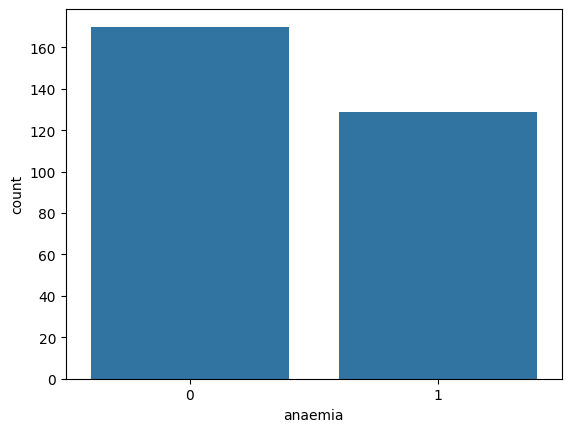

#################### diabetes ####################

          diabetes   Ratio

diabetes                  

0              174 58.1940

1              125 41.8060


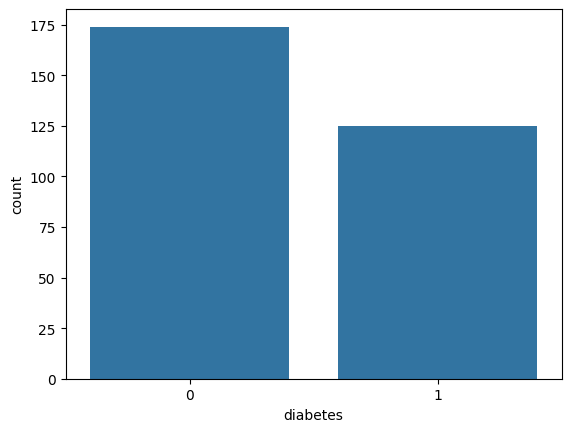

#################### high_blood_pressure ####################

                     high_blood_pressure   Ratio

high_blood_pressure                             

0                                    194 64.8829

1                                    105 35.1171


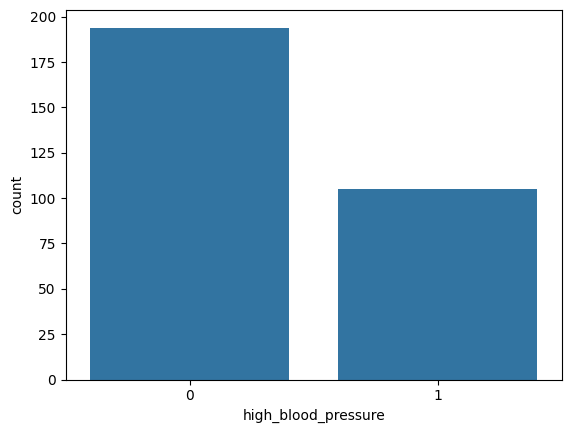

#################### sex ####################

     sex   Ratio

sex             

1    194 64.8829

0    105 35.1171


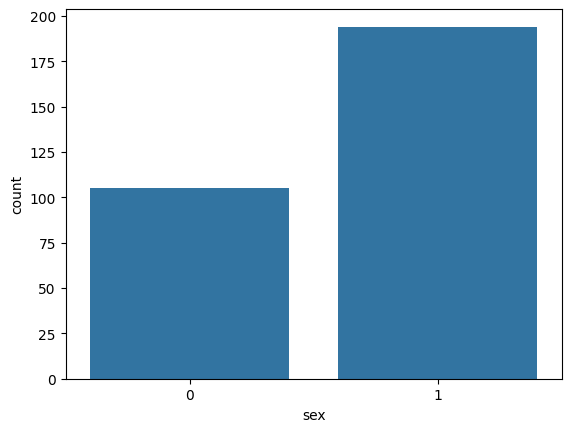

#################### smoking ####################

         smoking   Ratio

smoking                 

0            203 67.8930

1             96 32.1070


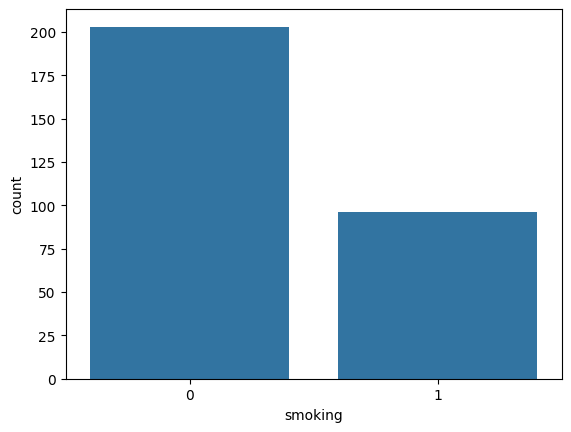

#################### DEATH_EVENT ####################

             DEATH_EVENT   Ratio

DEATH_EVENT                     

0                    203 67.8930

1                     96 32.1070


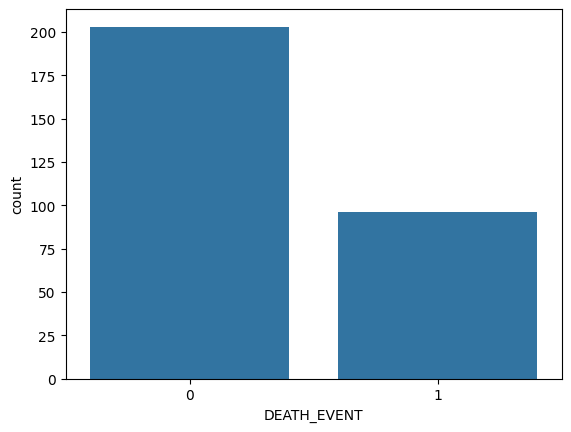

In [13]:
cat_summary_df(df)

In [14]:
def num_summary(dataframe, num_col, plot=False):
  print(20*"#", f"{num_col}", 20*"#")
  quantiles = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]
  print(dataframe[num_col]. describe(quantiles).T)
  if plot:
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.ylabel(num_col)
        plt.show(block=True)

In [15]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

#################### age ####################

count   299.0000

mean     60.8294

std      11.8950

min      40.0000

1%       40.0000

5%       42.9000

10%      45.0000

20%      50.0000

30%      53.0000

40%      58.0000

50%      60.0000

60%      63.0000

70%      65.0000

80%      70.0000

90%      75.4000

95%      82.0000

99%      90.0800

100%     95.0000

max      95.0000

Name: age, dtype: float64


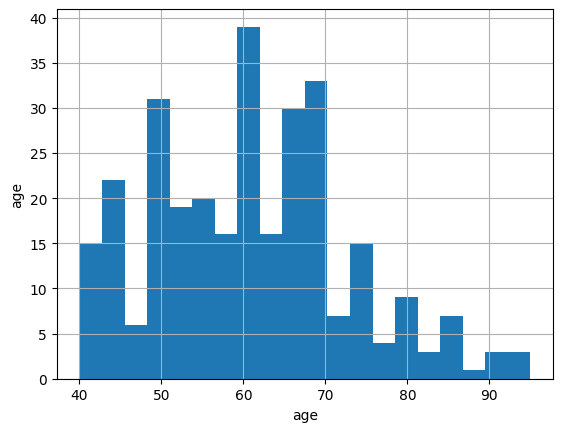

#################### creatinine_phosphokinase ####################

count    299.0000

mean     581.8395

std      970.2879

min       23.0000

1%        47.0000

5%        59.0000

10%       67.6000

20%      100.2000

30%      130.4000

40%      176.8000

50%      250.0000

60%      425.2000

70%      582.0000

80%      620.4000

90%     1203.8000

95%     2263.0000

99%     5222.4600

100%    7861.0000

max     7861.0000

Name: creatinine_phosphokinase, dtype: float64


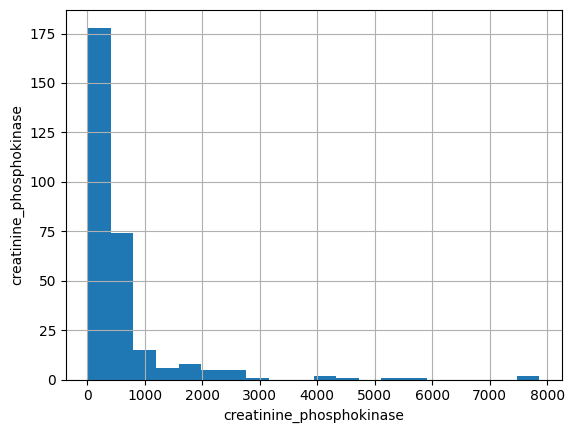

#################### ejection_fraction ####################

count   299.0000

mean     38.0836

std      11.8348

min      14.0000

1%       16.9600

5%       20.0000

10%      25.0000

20%      30.0000

30%      30.0000

40%      35.0000

50%      38.0000

60%      38.0000

70%      40.0000

80%      47.0000

90%      60.0000

95%      60.0000

99%      62.0600

100%     80.0000

max      80.0000

Name: ejection_fraction, dtype: float64


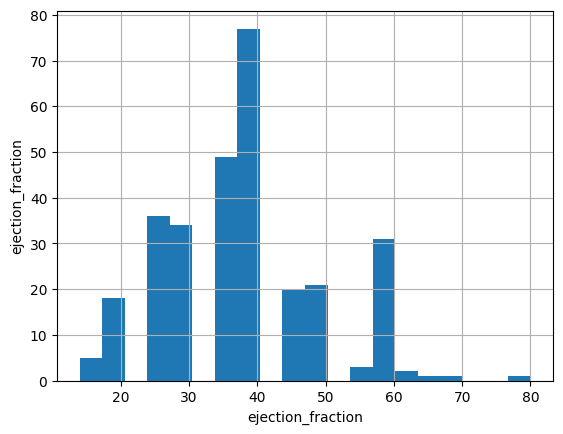

#################### platelets ####################

count      299.0000

mean    263358.0293

std      97804.2369

min      25100.0000

1%       61780.0000

5%      131800.0000

10%     153000.0000

20%     196000.0000

30%     221000.0000

40%     237000.0000

50%     262000.0000

60%     265000.0000

70%     285200.0000

80%     319800.0000

90%     374600.0000

95%     422500.0000

99%     544560.0000

100%    850000.0000

max     850000.0000

Name: platelets, dtype: float64


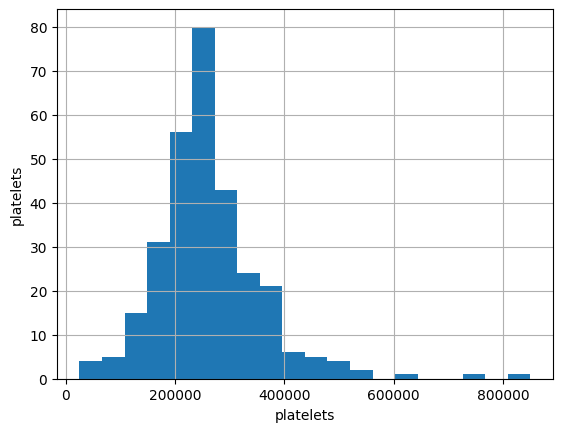

#################### serum_creatinine ####################

count   299.0000

mean      1.3939

std       1.0345

min       0.5000

1%        0.6000

5%        0.7000

10%       0.8000

20%       0.9000

30%       1.0000

40%       1.0000

50%       1.1000

60%       1.2000

70%       1.3000

80%       1.7000

90%       2.1000

95%       3.0000

99%       6.1140

100%      9.4000

max       9.4000

Name: serum_creatinine, dtype: float64


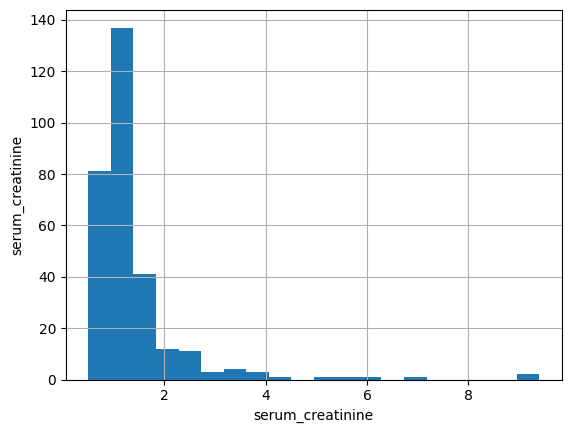

#################### serum_sodium ####################

count   299.0000

mean    136.6254

std       4.4125

min     113.0000

1%      123.9400

5%      130.0000

10%     132.0000

20%     134.0000

30%     135.0000

40%     136.0000

50%     137.0000

60%     138.0000

70%     139.0000

80%     140.0000

90%     141.2000

95%     144.0000

99%     145.0000

100%    148.0000

max     148.0000

Name: serum_sodium, dtype: float64


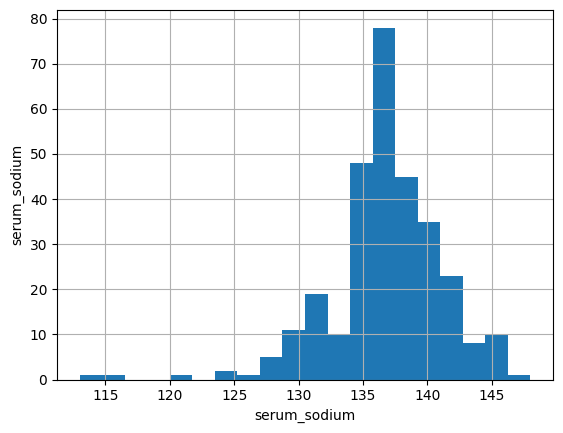

#################### time ####################

count   299.0000

mean    130.2609

std      77.6142

min       4.0000

1%        7.0000

5%       12.9000

10%      26.8000

20%      59.6000

30%      79.4000

40%      95.0000

50%     115.0000

60%     147.0000

70%     187.0000

80%     210.4000

90%     244.0000

95%     250.0000

99%     271.1400

100%    285.0000

max     285.0000

Name: time, dtype: float64


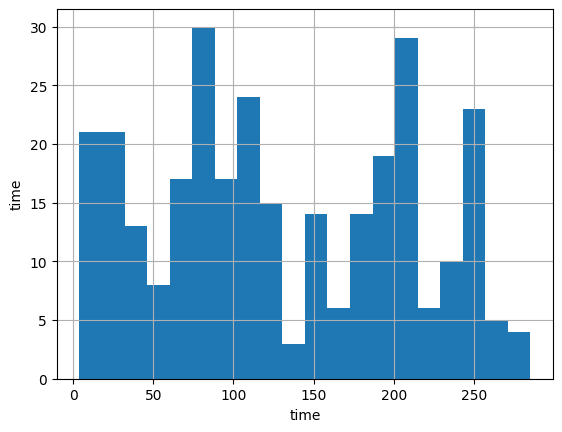

In [16]:
num_summary_df(df)

In [17]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  plt.figure(figsize=(12,8))
  for index, col in enumerate(num_cols):
    plt.subplot(3,3, index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

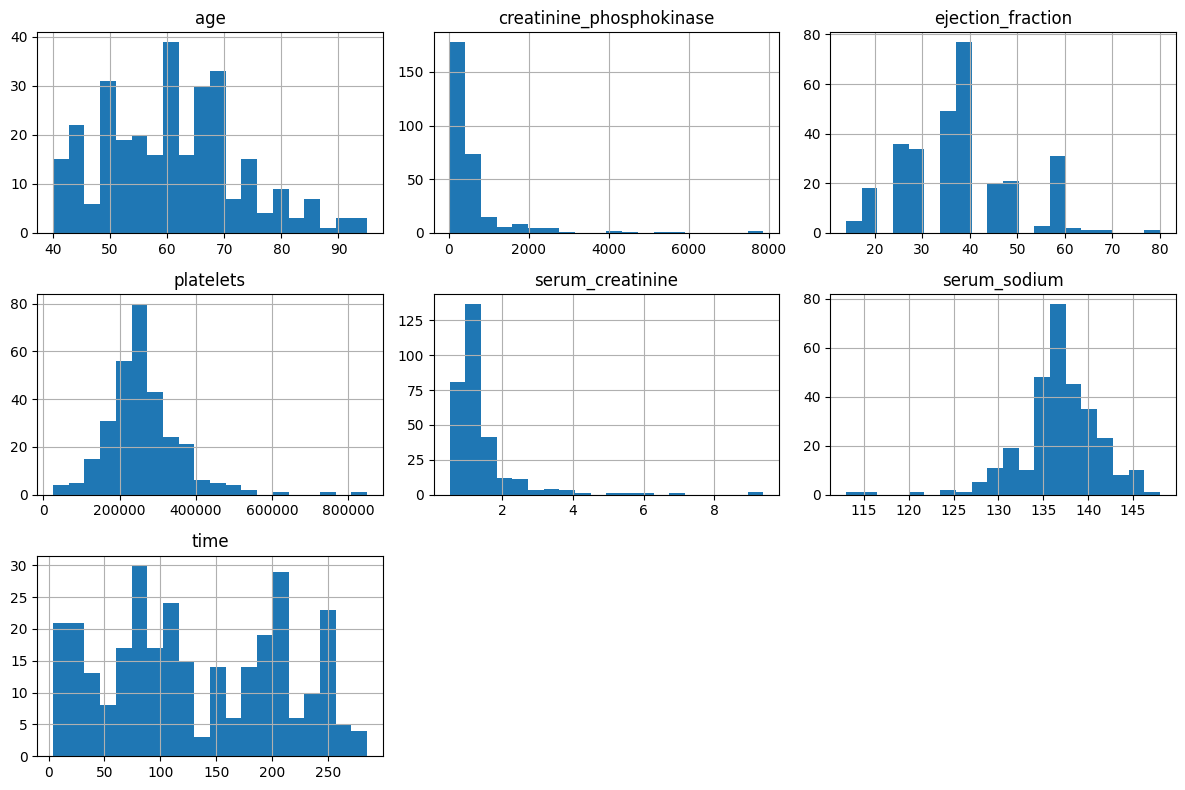

In [18]:
plot_num_summary(df)

# Target Analysis

In [19]:
def target_summary_with_num(dataframe, target, numerical_col):
  print(20*"#", f"{target} ---> {numerical_col}", 20*"#")
  print(dataframe.groupby(target).agg({numerical_col: "mean"}))

In [20]:
def target_summary_with_num_df(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    target_summary_with_num(dataframe, target, col)

In [21]:
target_summary_with_num_df(df, "DEATH_EVENT")

#################### DEATH_EVENT ---> age ####################

                age

DEATH_EVENT        

0           58.7586

1           65.2083

#################### DEATH_EVENT ---> creatinine_phosphokinase ####################

             creatinine_phosphokinase

DEATH_EVENT                          

0                            540.0542

1                            670.1979

#################### DEATH_EVENT ---> ejection_fraction ####################

             ejection_fraction

DEATH_EVENT                   

0                      40.2660

1                      33.4688

#################### DEATH_EVENT ---> platelets ####################

              platelets

DEATH_EVENT            

0           266657.4899

1           256381.0448

#################### DEATH_EVENT ---> serum_creatinine ####################

             serum_creatinine

DEATH_EVENT                  

0                      1.1849

1                      1.8358

#################### DEATH_EVENT -

# Correlation Analysis


In [22]:
def correlated_cols(dataframe):
  num_col = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64" ]]
  corr=dataframe[num_col].corr()
  sns.set(rc={'figure.figsize':(18,10)})
  sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
  plt.show()

  return corr

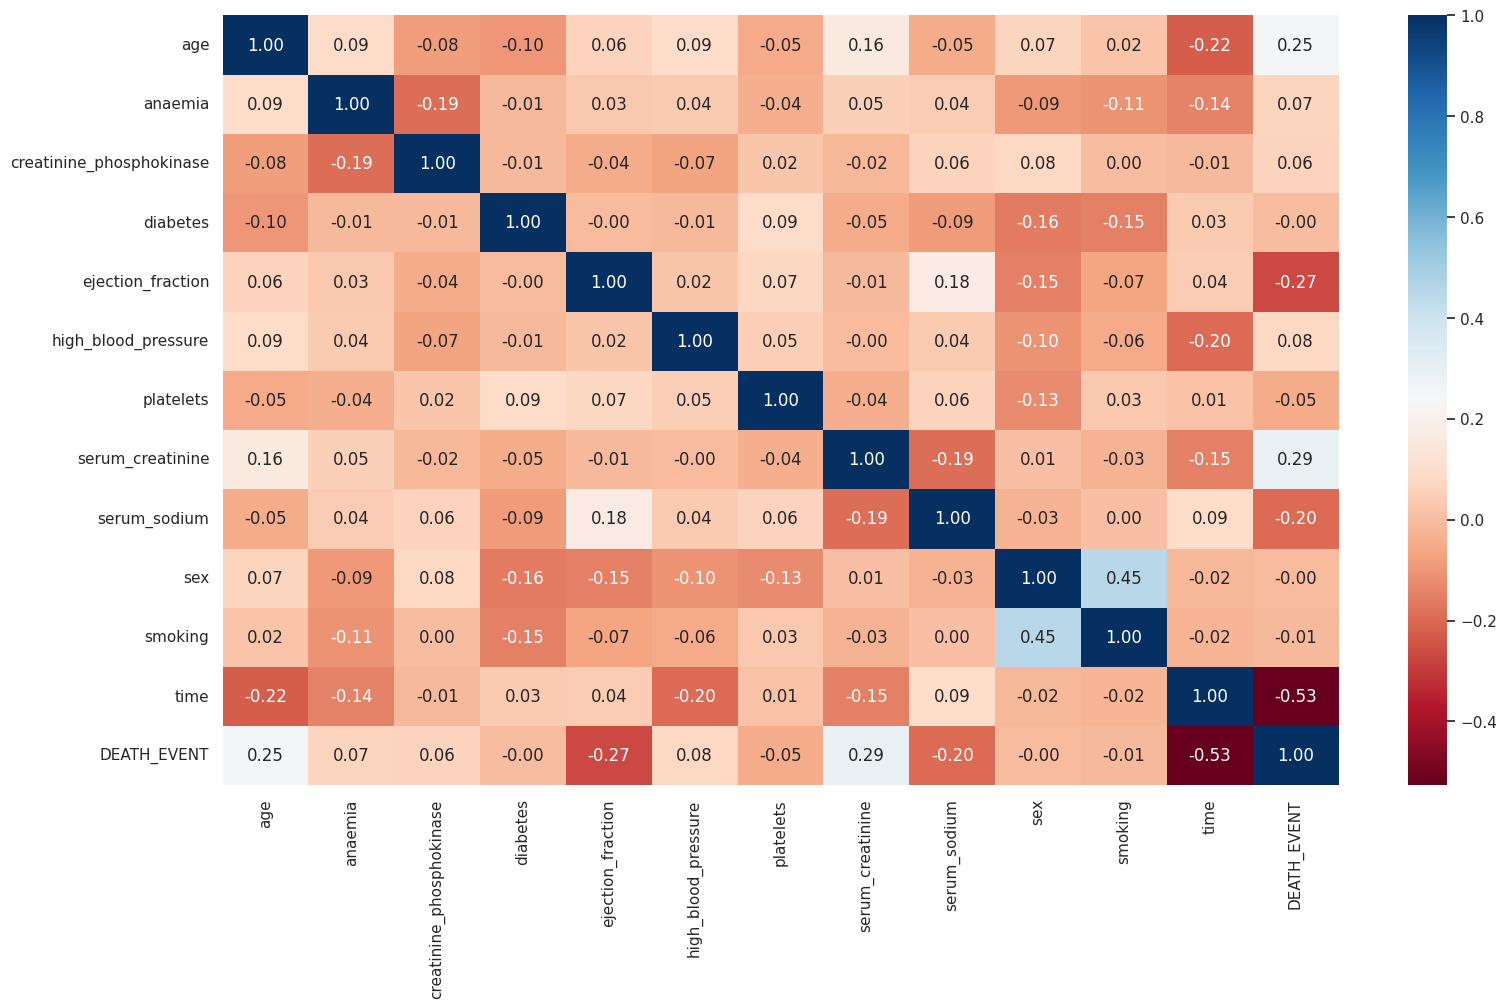

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.0000,0.0876,-0.0814,-0.1015,0.0602,0.0932,-0.0525,0.1592,-0.0459,0.0655,0.0189,-0.2243,0.2536
anaemia,0.0876,1.0000,-0.1907,-0.0127,0.0316,0.0382,-0.0438,0.0522,0.0419,-0.0948,-0.1073,-0.1414,0.0663
creatinine_phosphokinase,-0.0814,-0.1907,1.0000,-0.0096,-0.0441,-0.0706,0.0245,-0.0164,0.0596,0.0798,0.0024,-0.0093,0.0627
diabetes,-0.1015,-0.0127,-0.0096,1.0000,-0.0049,-0.0127,0.0922,-0.0470,-0.0896,-0.1577,-0.1472,0.0337,-0.0019
ejection_fraction,0.0602,0.0316,-0.0441,-0.0049,1.0000,0.0244,0.0722,-0.0113,0.1759,-0.1484,-0.0673,0.0417,-0.2686
high_blood_pressure,0.0932,0.0382,-0.0706,-0.0127,0.0244,1.0000,0.0500,-0.0049,0.0371,-0.1046,-0.0557,-0.1964,0.0794
platelets,-0.0525,-0.0438,0.0245,0.0922,0.0722,0.0500,1.0000,-0.0412,0.0621,-0.1251,0.0282,0.0105,-0.0491
serum_creatinine,0.1592,0.0522,-0.0164,-0.0470,-0.0113,-0.0049,-0.0412,1.0000,-0.1891,0.0070,-0.0274,-0.1493,0.2943
serum_sodium,-0.0459,0.0419,0.0596,-0.0896,0.1759,0.0371,0.0621,-0.1891,1.0000,-0.0276,0.0048,0.0876,-0.1952
sex,0.0655,-0.0948,0.0798,-0.1577,-0.1484,-0.1046,-0.1251,0.0070,-0.0276,1.0000,0.4459,-0.0156,-0.0043


In [23]:
correlated_cols(df)

In [24]:
def high_correlated_cols(dataframe, corr_th=0.90, plot=False):
  num_col = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8", "int64", "float64" ]]
  corr=dataframe[num_col].corr()
  corr_matrix=corr.abs()
  upper_triangle_matriks = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
  drop_list = [col for col in upper_triangle_matriks.columns if any(upper_triangle_matriks[col] > corr_th)]
  if drop_list == []:
    print(20*"#", "After Correlation Analysis. You don't need to remove variables", 20*"#")

  if plot:
    sns.set(rc={'figure.figsize':(18, 10)})
    sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
    plt.show()

  return drop_list

#################### After Correlation Analysis. You don't need to remove variables ####################


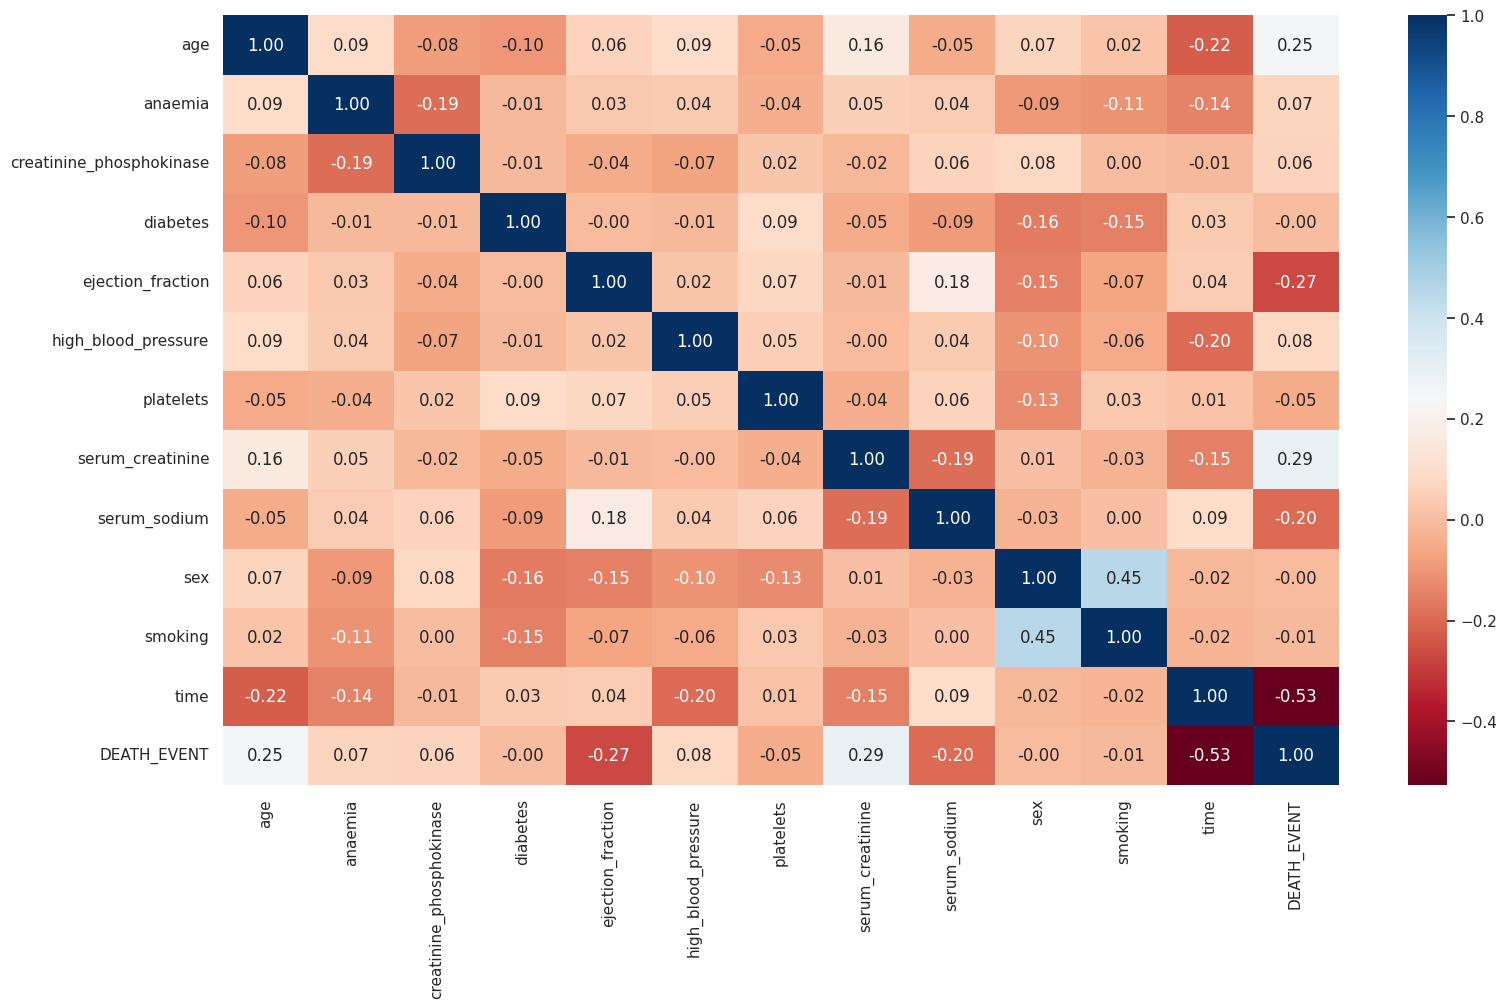

[]

In [25]:
high_correlated_cols(df, plot=True)

# Missing Value Analysis

In [26]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Create a Base Model: Random Forest Classifier

In [27]:
def  RF_Model(dataframe, target, results = False, test_size=0.30, plot_importance=False, save_model=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
  if results:
    acc_train = accuracy_score(y_train, rf_model.predict(X_train))
    acc_test = accuracy_score(y_test, rf_model.predict(X_test))
    r2 = rf_model.score(X, y)
    r2_train = rf_model.score(X_train, y_train)
    r2_test = rf_model.score(X_test, y_test)
    cv_train = cross_val_score(rf_model, X_train, y_train, cv=5).mean()
    cv_test = cross_val_score(rf_model, X_test, y_test, cv=5).mean()
    cv_results = cross_validate(rf_model, X, y, cv=5, scoring=["accuracy", "f1", "recall", "precision", "roc_auc"])
    print(20*"#", "Accuracy & Results", 20*"#")
    print("Accuracy Train : ", "%.3f" % acc_train)
    print("Accuracy Test : ", "%.3f" % acc_test)
    print("R2 Train : ", "%.3f" % r2_train)
    print("R2 Test : ", "%.3f" % r2_test)
    print("Cross Validation Train: ", "%.3f" % cv_train)
    print("Cross Validation Test: ", "%.3f" % cv_test)
    print("Cross Validation (Accucary)", "%.3f" %cv_results['test_accuracy'].mean())
    print("Cross Validation (F1)", "%.3f" %cv_results['test_f1'].mean())
    print("Cross Validation (Recall)", "%.3f" %cv_results['test_recall'].mean())
    print("Cross Validation (Precision)", "%.3f" %cv_results['test_precision'].mean())
    print("Cross Validation (roc_auc)", "%.3f" %cv_results['test_roc_auc'].mean())

  if plot_importance:
    feature_imp = pd.DataFrame({'Value' : rf_model.feature_importances_, 'Feature': X.columns})
    plt.figure(figsize=(7,7))
    sns.set(font_scale=1)
    sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value', ascending=False))
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.savefig("feature_importance.png")
    plt.show()

  if save_model:
    joblib.dump(rf_model, "rf_model.pkl")

  return rf_model

#################### Accuracy & Results ####################

Accuracy Train :  1.000

Accuracy Test :  0.767

R2 Train :  1.000

R2 Test :  0.767

Cross Validation Train:  0.862

Cross Validation Test:  0.744

Cross Validation (Accucary) 0.692

Cross Validation (F1) 0.456

Cross Validation (Recall) 0.537

Cross Validation (Precision) 0.656

Cross Validation (roc_auc) 0.850


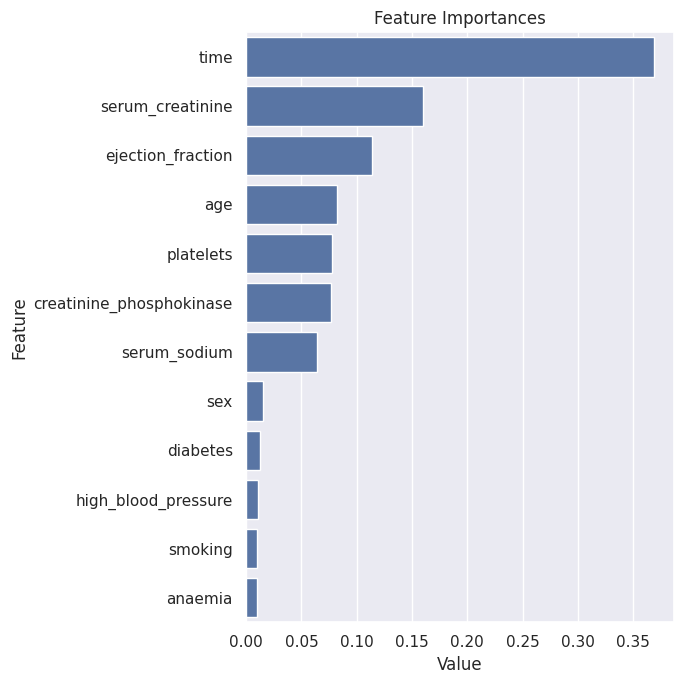

In [28]:
rf_model = RF_Model(df, "DEATH_EVENT", results=True, plot_importance=True, save_model=True)

# Loading a Base Model and Prediction

In [29]:
def load_model(pklfile):
  model_disc = joblib.load(pklfile)
  return model_disc

In [30]:
model_disc = load_model("rf_model.pkl")

In [31]:
X = df.drop("DEATH_EVENT", axis=1)
x = X.sample(1).values.tolist()
model_disc.predict(pd.DataFrame(X))[0]

1

In [35]:
sample2 = [50, 1, 900, 0, 20, 0, 327000.0000, 1.9000, 140, 0, 1, 5]

In [36]:
model_disc.predict(pd.DataFrame(sample2).T)[0]

1

# Model Tuning

In [37]:
def  RF_Model_Tuned(dataframe, target, results = False, test_size=0.30, plot_importance=False, save_model=False):
  X = dataframe.drop(target, axis=1)
  y = dataframe[target]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
  rf_model = RandomForestClassifier(random_state=42)
  rf_params = {
      "max_depth": [2, 5, 8],
      "max_features": [2, 5],
      "n_estimators": [500, 1000],
      "min_samples_split": [5, 10]
  }
  rf_cv_model=GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X_train, y_train)
  rf_model_tuned = rf_model.set_params(**rf_cv_model.best_params_).fit(X, y)
  if results:
    acc_train = accuracy_score(y_train, rf_model_tuned.predict(X_train))
    acc_test = accuracy_score(y_test, rf_model_tuned.predict(X_test))
    r2 = rf_model_tuned.score(X, y)
    r2_train = rf_model_tuned.score(X_train, y_train)
    r2_test = rf_model_tuned.score(X_test, y_test)
    cv_train = cross_val_score(rf_model_tuned, X_train, y_train, cv=5).mean()
    cv_test = cross_val_score(rf_model_tuned, X_test, y_test, cv=5).mean()
    cv_results = cross_validate(rf_model_tuned, X, y, cv=5, scoring=["accuracy", "f1", "recall", "precision", "roc_auc"])
    print(20*"#", "Accuracy & Results", 20*"#")
    print("Accuracy Train : ", "%.3f" % acc_train)
    print("Accuracy Test : ", "%.3f" % acc_test)
    print("R2 Train : ", "%.3f" % r2_train)
    print("R2 Test : ", "%.3f" % r2_test)
    print("Cross Validation Train: ", "%.3f" % cv_train)
    print("Cross Validation Test: ", "%.3f" % cv_test)
    print("Cross Validation (Accucary)", "%.3f" %cv_results['test_accuracy'].mean())
    print("Cross Validation (F1)", "%.3f" %cv_results['test_f1'].mean())
    print("Cross Validation (Recall)", "%.3f" %cv_results['test_recall'].mean())
    print("Cross Validation (Precision)", "%.3f" %cv_results['test_precision'].mean())
    print("Cross Validation (roc_auc)", "%.3f" %cv_results['test_roc_auc'].mean())

  if plot_importance:
    feature_imp = pd.DataFrame({'Value' : rf_model_tuned.feature_importances_, 'Feature': X.columns})
    plt.figure(figsize=(7,7))
    sns.set(font_scale=1)
    sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value', ascending=False))
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.savefig("feature_importance.png")
    plt.show()

  if save_model:
    joblib.dump(rf_model_tuned, "rf_model.pkl")

  return rf_model_tuned

Fitting 5 folds for each of 24 candidates, totalling 120 fits

#################### Accuracy & Results ####################

Accuracy Train :  0.962

Accuracy Test :  0.878

R2 Train :  0.962

R2 Test :  0.878

Cross Validation Train:  0.885

Cross Validation Test:  0.778

Cross Validation (Accucary) 0.719

Cross Validation (F1) 0.487

Cross Validation (Recall) 0.537

Cross Validation (Precision) 0.716

Cross Validation (roc_auc) 0.879


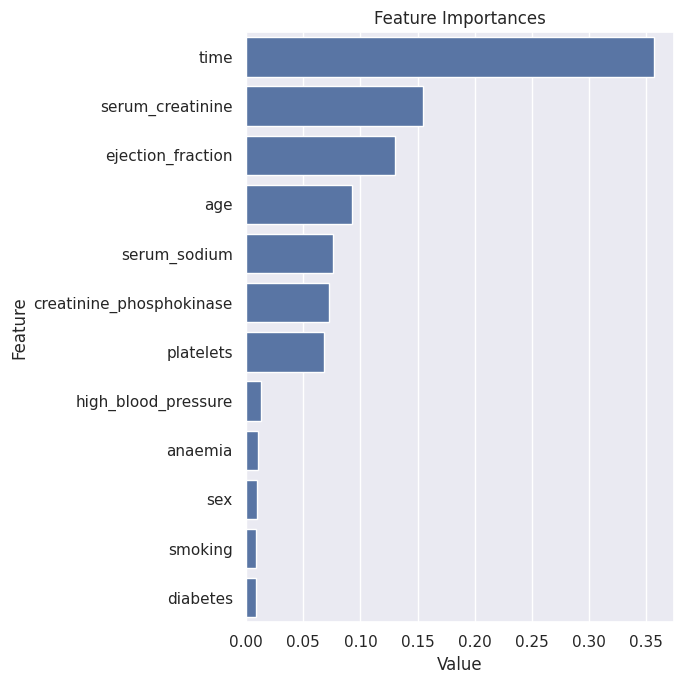

In [39]:
rf_model_tuned = RF_Model_Tuned(df, "DEATH_EVENT", results=True, plot_importance=True, save_model=True)

# Loading a Base Model and Prediction

In [42]:
def load_model(pklfile):
  model_disc = joblib.load(pklfile)
  return model_disc

In [43]:
model_disc = load_model("rf_model.pkl")

In [45]:
X = df.drop("DEATH_EVENT", axis=1)
x = X.sample(1).values.tolist()
model_disc.predict(pd.DataFrame(X))[0]

1

In [46]:
sample2 = [50, 1, 900, 0, 20, 0, 327000.0000, 1.9000, 140, 0, 1, 5]

In [47]:
model_disc.predict(pd.DataFrame(sample2).T)[0]

1